<a href="https://colab.research.google.com/github/ashirm1999/Web-Traffic-Time-Series-Forecasting/blob/main/LSTM_Ashir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle

In [2]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download web-traffic-time-series-forecasting

train_2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
key_2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission_1.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission_2.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_1.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
key_1.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
#! unzip key_1.csv.zip
#! unzip key_2.csv.zip
! unzip train_1.csv.zip
! unzip train_2.csv.zip

Archive:  train_1.csv.zip
replace train_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  train_2.csv.zip
replace train_2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import random

In [8]:
df1 = pd.read_csv('/content/train_1.csv')
#df2 = pd.read_csv('/content/train_2.csv')

In [9]:
df1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [10]:
df1 = df1.fillna(0)

In [11]:
page = df1['Page']
df1 = df1.drop('Page',axis = 1)

In [12]:
row = df1.iloc[90000,:].values
X = row[0:549]
y = row[1:550]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X_train.shape, y_train.shape)

# Feature Scaling

sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
print(X_train.shape, y_train.shape)

X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

(384,) (384,)
(384, 1) (384, 1)


In [13]:
#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))

# Initialising the RNN
model = Sequential()

# Adding the input layerand the LSTM layer
model.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
model.add(Dense(units = 1))

model.summary()

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
39/39 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 2/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 5/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 6/100
39/39 [==============================] - 0

In [14]:
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))

y_pred = model.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

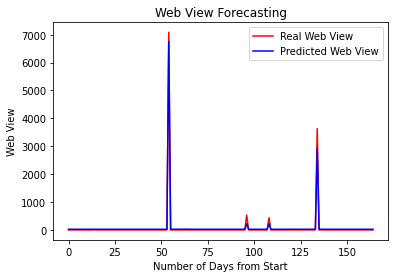

In [15]:
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

[ 14.  15.  11.  14.  11.  11.  20.  50.  20.  22.   6.  45.  17.   4.
  11.   8.   8.  14.  13.   6.  22.  46.  11.  15.  38.  20.  15.  13.
  31.  16.  41.  18.  15.  20.  10.  49.  12.   7.  13.  14.  18.  26.
   5.  20.   9.  15.  16.  27.  47.  11.  10.  20.   5.  10.  11.  18.
  27.   8.  36.  12.  38.  19.  14.  30.  11.  14.  24.   7.  11.  40.
  19.  14.  15.  21.  22.  25.  17.  13.  23.  13.  15.  22.  20.   6.
  15.  30.   9.  18.  20.  19.   9.  13.  11.   8.  21.  15.  13.  13.
  15.  17.  15.  16.  11.  12.  10.  10.  28.  18.  19.  23.   5.   8.
  33.  12.  14.  23.  16.  18.  27.  16.  25.  18.  21.   9.  12.   8.
  45.  11.  16.  20.   9.  12.  20.   7.  14.  23.   9.  10.  13.  16.
  14.  12.  50.  11.  15.  31.   9.  44.   9.  18.  18.  21.  23.  49.
  22.  14.  17.  10.  13.  14.  29.  17.  24.  12.   8.  13.  37.  11.
  30.  10.  10.  19.  18.  12.  31.  13.  14.  15.  15.  23.  40.   9.
  10.   5.  23.   8.  16.   5.  17.  60.  24.  15. 115.  10.  15.  79.
  14. 

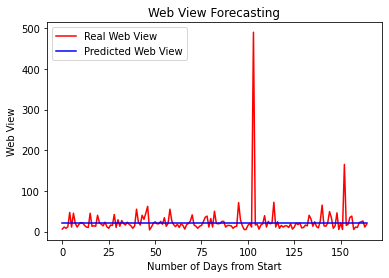

In [16]:
row = df1.iloc[0,:].values
X = row[0:549]
y = row[1:550]

# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X_train, y_train)

# Feature Scaling

sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [17]:
# Initialising the RNN
model = Sequential()

# Adding the input layerand the LSTM layer
model.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))

# Adding the output layer
model.add(Dense(units = 1))

model.summary()

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 8)                 320       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
39/39 [==============================] - 1s 2ms/step - loss: 0.0135
Epoch 2/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 5/100
39/39 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 6/100
39/39 [==============================] -

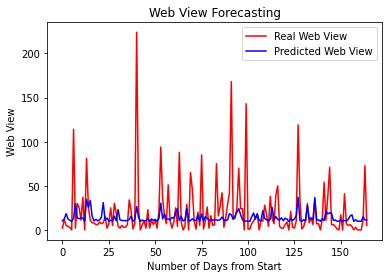

In [18]:
row = df1.iloc[10,:].values
X = row[0:549]
y = row[1:550]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature Scaling
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

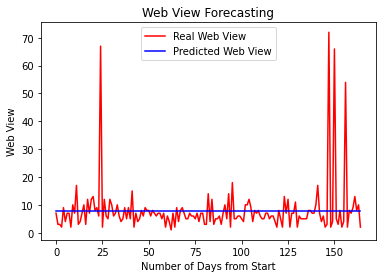

In [19]:
row = df1.iloc[100,:].values
X = row[0:549]
y = row[1:550]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

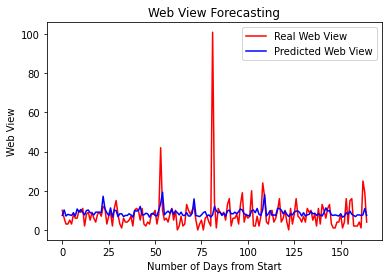

In [20]:
row = df1.iloc[1000,:].values
X = row[0:549]
y = row[1:550]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Reshaping Array
X_train = np.reshape(X_train, (384,1,1))

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Getting the predicted Web View
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

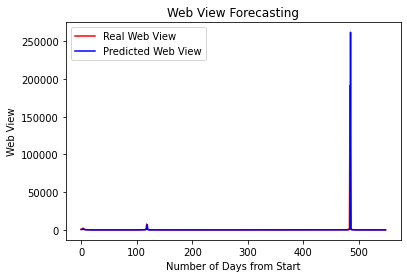

In [21]:
train_row = df1.iloc[90000,:].values
X = train_row[0:549]
y = train_row[1:550]

sc = MinMaxScaler()
X_train = np.reshape(X,(-1,1))
y_train = np.reshape(y,(-1,1))
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Reshaping Array
X_train = np.reshape(X_train, (549,1,1))

regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Getting the predicted Web View
test_row = df1.iloc[10000,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()


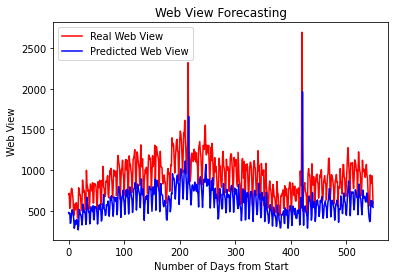

In [22]:
# Getting the predicted Web View
test_row = df1.iloc[5000,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

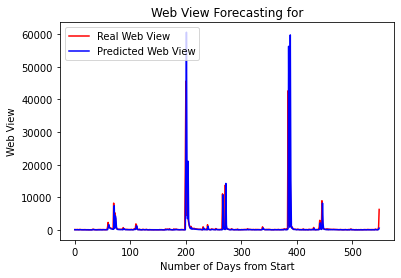

In [23]:
X_value = random.randint(0,df1.shape[0])
test_row = df1.iloc[X_value,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting for')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

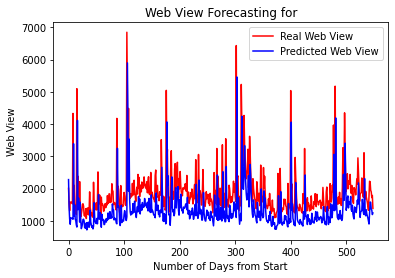

In [24]:
X_value = random.randint(0,df1.shape[0])
test_row = df1.iloc[X_value,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting for')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

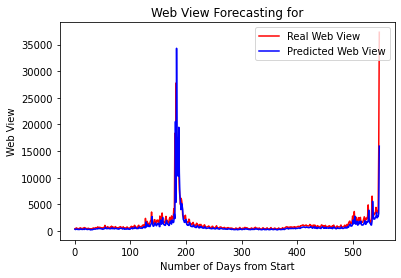

In [25]:
X_value = random.randint(0,df1.shape[0])
test_row = df1.iloc[X_value,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting for')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

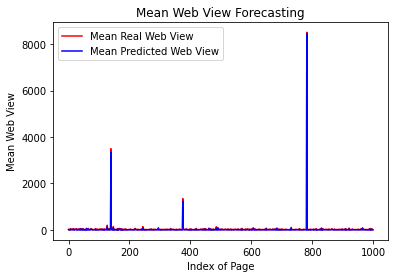

In [26]:
y_test_mean = []
y_pred_mean = []
for X_value in range(0,1000):
    test_row = df1.iloc[X_value,:].values
    X_test = test_row[0:549]
    y_test = test_row[1:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))

plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.xlabel('Index of Page')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()

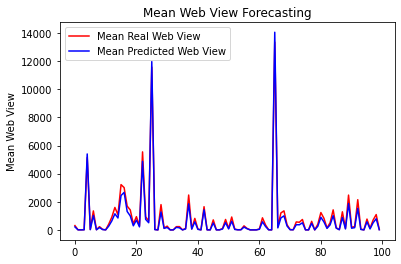

In [27]:
pages = np.random.randint(0,df1.shape[0],100)
y_test_mean = []
y_pred_mean = []
for X_value in pages:
    test_row = df1.iloc[X_value,:].values
    X_test = test_row[0:549]
    y_test = test_row[1:550]
    y_test_mean.append(np.mean(y_test))
    inputs = X_test
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549, 1, 1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_mean.append(np.mean(y_pred))
    
#Visualising mean
plt.figure
plt.plot(y_test_mean, color = 'red', label = 'Mean Real Web View')
plt.plot(y_pred_mean, color = 'blue', label = 'Mean Predicted Web View')
plt.title('Mean Web View Forecasting')
plt.ylabel('Mean Web View')
plt.legend()
plt.show()